In [1]:
# Importing the Required Libraries

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.utils import to_categorical
from keras.initializers import he_normal
from keras.layers.normalization import BatchNormalization
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
K.set_image_data_format('channels_last') # set the data format for our model

Using TensorFlow backend.


In [2]:
# Loading MNIST Dataset

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 4s 0us/step


In [3]:
# Data Preprocessing Steps

# Given dimensions of image is 28X28X1 a grayscale image

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


#MODEL-1 CNN with 3 Layers

---



In [4]:
from keras.callbacks import EarlyStopping

early_stoppping = EarlyStopping(monitor='val_loss',patience = 5,verbose=1)

model_1 = Sequential()

model_1.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(28,28,1)))

model_1.add(Conv2D(64, (3, 3), activation='relu'))

model_1.add(MaxPooling2D(pool_size=(2, 2)))

model_1.add(Dropout(0.25))

model_1.add(Conv2D(128, (3, 3), activation='relu'))

model_1.add(MaxPooling2D(pool_size=(2, 2)))

model_1.add(Flatten())

model_1.add(Dense(256, activation='relu',kernel_initializer=he_normal(seed=None)))

model_1.add(Dropout(0.5))

model_1.add(Dense(10, activation='softmax'))

model_1.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])

my_model_1 = model_1.fit(x_train, y_train,batch_size=128,epochs=50,verbose=1,validation_data=(x_test, y_test),callbacks=[early_stoppping])

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 14s 235us/step - loss: 0.0347 - acc: 0.9881 - val_loss: 0.0072 - val_acc: 0.9975
Epoch 2/50
60000/60000 [==============================] - 11s 185us/step - loss: 0.0118 - acc: 0.9962 - val_loss: 0.0051 - val_acc: 0.9982
Epoch 3/50
60000/60000 [==============================] - 11s 185us/step - loss: 0.0081 - acc: 0.9973 - val_loss: 0.0047 - val_acc: 0.9983
Epoch 4/50
60000/60000 [==============================] - 11s 185us/step - loss: 0.0066 - acc: 0.9978 - val_loss: 0.0045 - val_acc: 0.9984
Epoch 5/50
60000/60000 [==============================] - 11s 184us/step - loss: 0.0056 - acc: 0.9982 - val_loss: 0.0039 - val_acc: 0.9987
Epoch 6/50
60000/60000 [==============================] - 11s 185us/step - loss: 0.0046 - acc: 0.9984 - val_loss: 0.0053 - val_acc: 0.9984
Epoch 7/50
60000/60000 [==============================] - 11s 185us/step - loss: 0.0041 - acc: 0.9986 - val_loss: 0.

Test score: 0.003630750371064505
Test accuracy: 0.9989699977874756


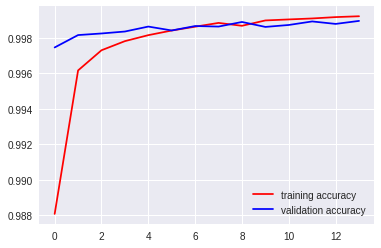

In [5]:
score_1 = model_1.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score_1[0]) 
print('Test accuracy:', score_1[1])

plt.plot(my_model_1.history['acc'], 'r')
plt.plot(my_model_1.history['val_acc'], 'b')
plt.legend({'training accuracy': 'r', 'validation accuracy':'b'})
plt.show()



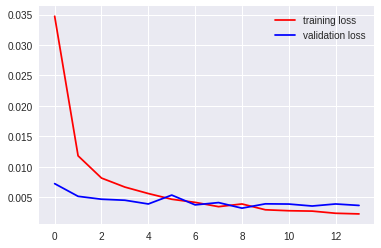

In [6]:
plt.plot(my_model_1.history['loss'], 'r')
plt.plot(my_model_1.history['val_loss'], 'b')
plt.legend({'training loss': 'r', 'validation loss':'b'})
plt.show()

# MODEL-2 CNN with 5 Layers

In [7]:
model_2 = Sequential()


model_2.add(Conv2D(8, kernel_size=(5, 5),padding='same',activation='relu',input_shape=(28,28,1)))


model_2.add(Conv2D(16, (5, 5), activation='relu'))


model_2.add(MaxPooling2D(pool_size=(2, 2),padding='same'))


model_2.add(Dropout(0.25))


model_2.add(Conv2D(32, (5, 5),padding='same', activation='relu'))


model_2.add(MaxPooling2D(pool_size=(2, 2),padding='same'))


model_2.add(Dropout(0.25))


model_2.add(Conv2D(64, (5, 5),padding='same',activation='relu'))


model_2.add(Conv2D(64, (5, 5), activation='relu'))


model_2.add(MaxPooling2D(pool_size=(2, 2),padding='same'))


model_2.add(Dropout(0.25))


model_2.add(Flatten())


model_2.add(Dense(256, activation='relu',kernel_initializer=he_normal(seed=None)))


model_2.add(BatchNormalization())


model_2.add(Dropout(0.5))


model_2.add(Dense(10, activation='softmax'))


model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


my_model_2 = model_2.fit(x_train, y_train,batch_size=128,epochs=12,verbose=1,validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 9s 158us/step - loss: 0.4075 - acc: 0.8695 - val_loss: 0.0538 - val_acc: 0.9829
Epoch 2/12
60000/60000 [==============================] - 8s 140us/step - loss: 0.0980 - acc: 0.9725 - val_loss: 0.0440 - val_acc: 0.9867
Epoch 3/12
60000/60000 [==============================] - 8s 141us/step - loss: 0.0728 - acc: 0.9794 - val_loss: 0.0255 - val_acc: 0.9923
Epoch 4/12
60000/60000 [==============================] - 8s 141us/step - loss: 0.0602 - acc: 0.9825 - val_loss: 0.0237 - val_acc: 0.9927
Epoch 5/12
60000/60000 [==============================] - 8s 141us/step - loss: 0.0548 - acc: 0.9843 - val_loss: 0.0217 - val_acc: 0.9934
Epoch 6/12
60000/60000 [==============================] - 8s 142us/step - loss: 0.0460 - acc: 0.9871 - val_loss: 0.0291 - val_acc: 0.9916
Epoch 7/12
60000/60000 [==============================] - 9s 143us/step - loss: 0.0431 - acc: 0.9878 - val_loss: 0.0271 - 

Test score: 0.017415812282267688
Test accuracy: 0.9942


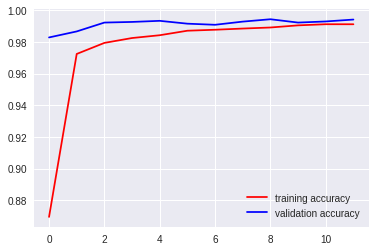

In [8]:
score_2 = model_2.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score_2[0]) 
print('Test accuracy:', score_2[1])

plt.plot(my_model_2.history['acc'], 'r')
plt.plot(my_model_2.history['val_acc'], 'b')
plt.legend({'training accuracy': 'r', 'validation accuracy':'b'})
plt.show()


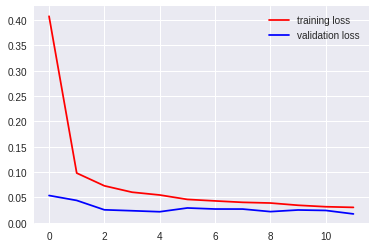

In [9]:
plt.plot(my_model_2.history['loss'], 'r')
plt.plot(my_model_2.history['val_loss'], 'b')
plt.legend({'training loss': 'r', 'validation loss':'b'})
plt.show()

# MODEL-3 CNN with 7 Layers

In [11]:
model_3 = Sequential()


model_3.add(Conv2D(32, kernel_size=(2, 2),padding='same',activation='relu',input_shape=(28,28,1)))


model_3.add(Conv2D(32, (2, 2), activation='relu'))


model_3.add(MaxPooling2D(pool_size=(3, 3), strides=(1,1)))


model_3.add(Dropout(0.3))


model_3.add(Conv2D(64, (2, 2), activation='relu'))


model_3.add(MaxPooling2D(pool_size=(2, 2),padding='same'))


model_3.add(Conv2D(64, (2, 2),padding='same',activation='relu'))


model_3.add(Conv2D(128, (2, 2), activation='relu'))


model_3.add(MaxPooling2D(pool_size=(3, 3),padding='same'))


model_3.add(Dropout(0.25))


model_3.add(Conv2D(128, (2, 2),padding='same',activation='relu'))


model_3.add(Conv2D(256, (2, 2), activation='relu'))


model_3.add(MaxPooling2D(pool_size=(2, 2), strides=(1,1)))


model_3.add(Dropout(0.25))


model_3.add(Flatten())


model_3.add(Dense(256, activation='relu',kernel_initializer=he_normal(seed=None)))


model_3.add(BatchNormalization())


model_3.add(Dropout(0.5))


model_3.add(Dense(128, activation='relu',kernel_initializer=he_normal(seed=None)))


model_3.add(Dropout(0.25))


model_3.add(Dense(10, activation='softmax'))


model_3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


my_model_3 = model_3.fit(x_train, y_train,batch_size=128,epochs=10,verbose=1,validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 19s 312us/step - loss: 0.4120 - acc: 0.8620 - val_loss: 0.0495 - val_acc: 0.9837
Epoch 2/10
60000/60000 [==============================] - 17s 286us/step - loss: 0.0929 - acc: 0.9726 - val_loss: 0.0439 - val_acc: 0.9855
Epoch 3/10
60000/60000 [==============================] - 17s 285us/step - loss: 0.0666 - acc: 0.9801 - val_loss: 0.0303 - val_acc: 0.9910
Epoch 4/10
60000/60000 [==============================] - 17s 283us/step - loss: 0.0561 - acc: 0.9836 - val_loss: 0.0287 - val_acc: 0.9918
Epoch 5/10
60000/60000 [==============================] - 17s 283us/step - loss: 0.0502 - acc: 0.9855 - val_loss: 0.0212 - val_acc: 0.9930
Epoch 6/10
60000/60000 [==============================] - 17s 284us/step - loss: 0.0432 - acc: 0.9871 - val_loss: 0.0237 - val_acc: 0.9918
Epoch 7/10
60000/60000 [==============================] - 17s 284us/step - loss: 0.0382 - acc: 0.9886 - val_loss: 0.

Test score: 0.020454944854525092
Test accuracy: 0.9943


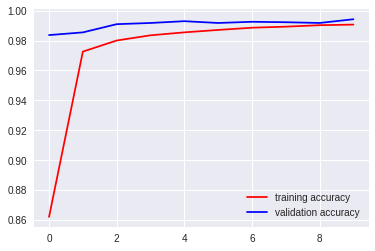

In [12]:
score_3 = model_3.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score_3[0]) 
print('Test accuracy:', score_3[1])

plt.plot(my_model_3.history['acc'], 'r')
plt.plot(my_model_3.history['val_acc'], 'b')
plt.legend({'training accuracy': 'r', 'validation accuracy':'b'})
plt.show()

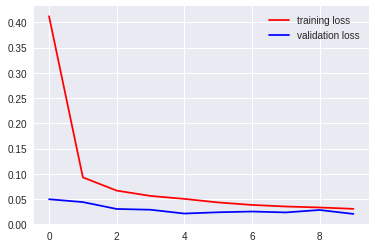

In [13]:
plt.plot(my_model_3.history['loss'], 'r')
plt.plot(my_model_3.history['val_loss'], 'b')
plt.legend({'training loss': 'r', 'validation loss':'b'})
plt.show()

# Performance Comparison of the Models Using Pretty Table

In [14]:
from prettytable import PrettyTable

# Names of models
names = ['Model 1 -- CNN with 3 Hidden Layers','Model 2 -- CNN with 5 Hidden Layers','Model 3 -- CNN with 7 Hidden Layers']
         

# Training accuracies
train_acc = [max(my_model_1.history['acc']),max(my_model_2.history['acc']),max(my_model_3.history['acc'])]

# Test accuracies
test_acc = [score_1[1],score_2[1],score_3[1]]

numbering = [1,2,3]

# Initializing prettytable
ptable = PrettyTable()

# Adding columns
ptable.add_column("S.NO.",numbering)
ptable.add_column("MODEL",names)
ptable.add_column("Training Accuracy",train_acc)
ptable.add_column("Test Accuracy",test_acc)

# Printing the Table
print(ptable)

+-------+-------------------------------------+--------------------+--------------------+
| S.NO. |                MODEL                | Training Accuracy  |   Test Accuracy    |
+-------+-------------------------------------+--------------------+--------------------+
|   1   | Model 1 -- CNN with 3 Hidden Layers | 0.9992333401997884 | 0.9989699977874756 |
|   2   | Model 2 -- CNN with 5 Hidden Layers | 0.9912500000317891 |       0.9942       |
|   3   | Model 3 -- CNN with 7 Hidden Layers | 0.9907166666984558 |       0.9943       |
+-------+-------------------------------------+--------------------+--------------------+
